
# EMATM0048: Software Development Programming and Algorithms (SDPA)
# `Tutorial 8B - Web Scraping`


This section briefly summarizes the most important calls with requests. For details see the documentation (http://docs.python-requests.org/en/latest/).

### Installation
In the following you find an install procedure working within the notebook (respectively after restart). Usefull links for installing modules and managing packages can be found here:

- Python Setup Tools (https://pypi.python.org/pypi/setuptools) : Software managers are easy_install or pip
- Installing Python Modules (https://docs.python.org/2/install/index.html) : Standard command after downloading the source python setup.py install



# Part A: APIs
In this tutorial, we will take a look at a way to gather data using API scraping. Most websites offer an API (or Application Programming Interface) as a service which provides a high level interface to directly retrieve data from their repositories or databases at the backend.

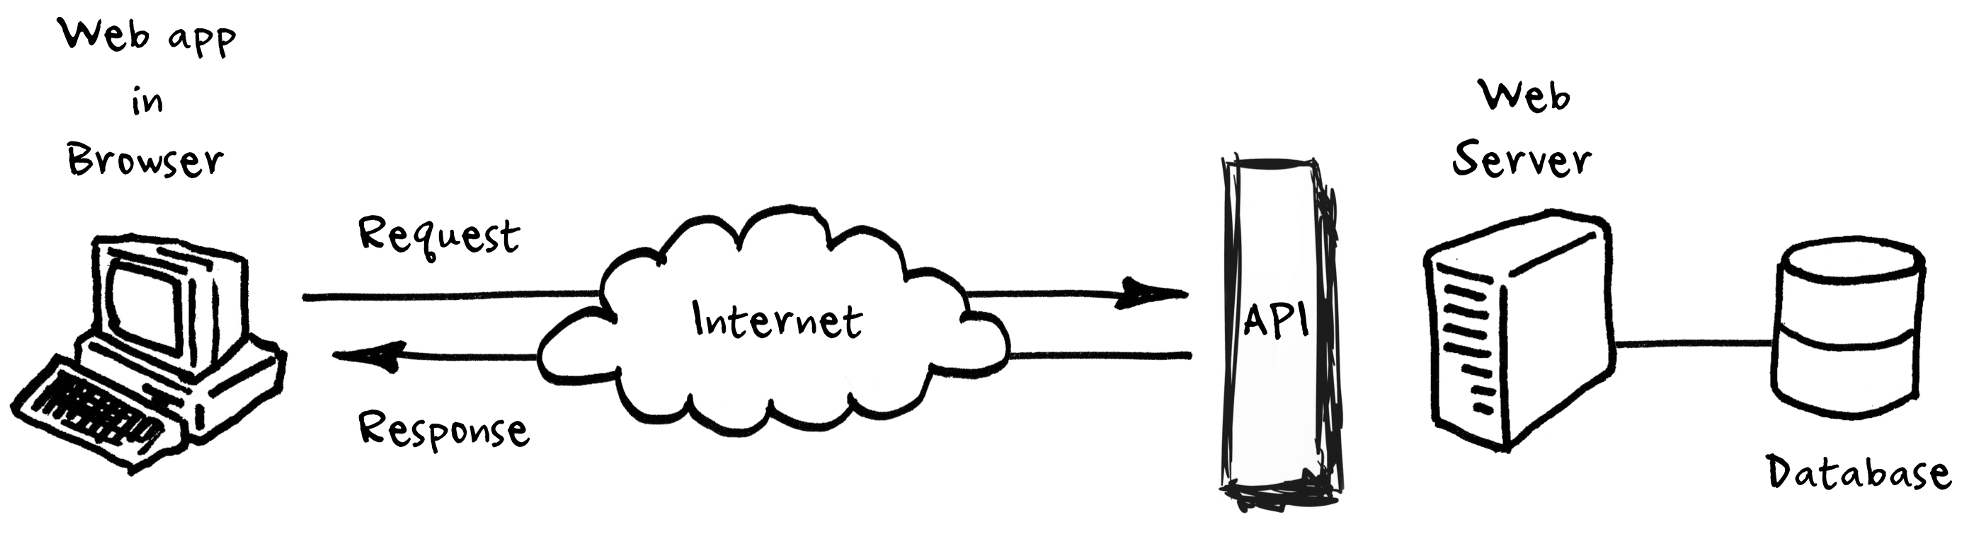

source: https://monashdatafluency.github.io/python-web-scraping/section-3-API-based-scraping/

In this tutorial we will learn about: 
* How to call APIs
* Example I: Wikipedia API
* Example II: Twitter API
* Example III: Foursquare API

## Example I: Wikipedia API

Let's say we want to gather some additional data about the university of bristol and since wikipedia is a rich source for data.  For e.g. consider the wikipedia article for university of Bristol (https://en.wikipedia.org/wiki/University_of_Bristol). 
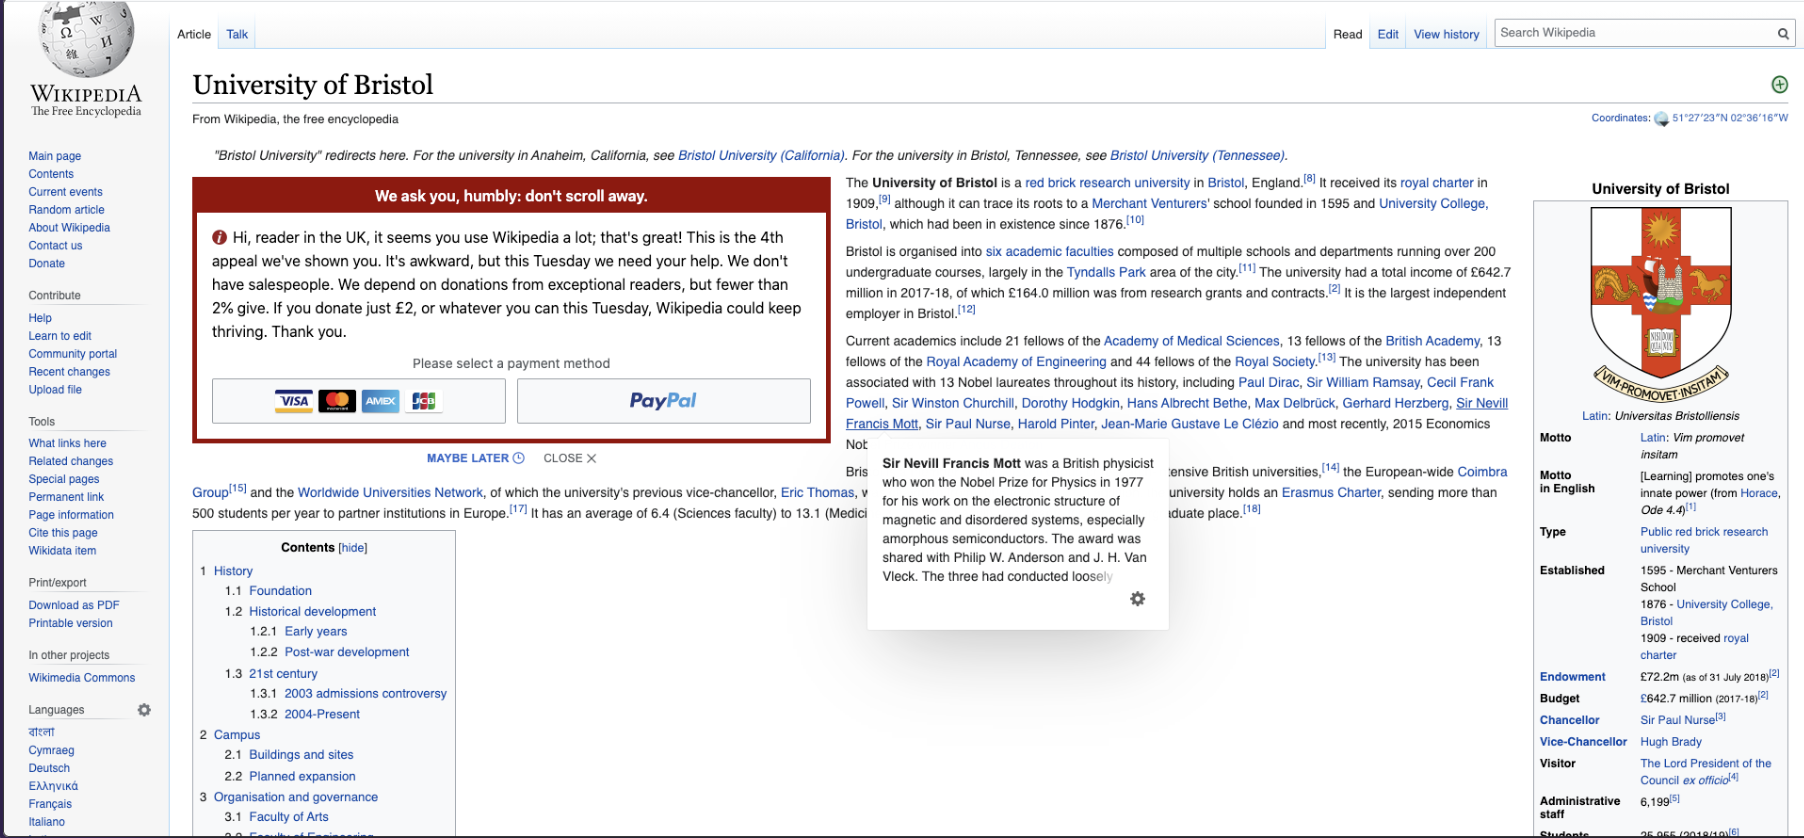
Let's begin by installing some of libraries we will use for this excercise as follows

In [1]:
# sudo apt install libcurl4-openssl-dev libssl-dev
!pip install wikipedia
!pip install wordcloud
!pip install requests

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import json
import wikipedia
import pandas as pd

wikipedia provides easy to use methods to directly call the wiki API on our behalf and get us all the wikipedia data. Let's try retrieving data for the university of Bristol as follows,

In [4]:
print(wikipedia.search("University of Bristol"))

['University of Bristol', 'University of the West of England, Bristol', 'Bristol', "University of Bristol Students' Union", 'List of University of Bristol people', 'University College, Bristol', 'Bristol stool scale', 'Diamond battery', 'Jean Golding', 'University of Bristol Dental Hospital']


As you see in the output, the searched title along with the related search suggestions are displayed. There are some of the ways where you can filter the search results by using search parameters such as results and suggestion (I know don’t worry about the spelling). The result returns the maximum number of results and the suggestion if True, return results and suggestion (if any) in a tuple.

In [6]:
print(wikipedia.search("University of Bristol", results = 5, suggestion = True))

(['University of Bristol', 'University of the West of England, Bristol', 'Bristol', "University of Bristol Students' Union", 'University College, Bristol'], None)


## Extracting Wikipedia Article Summary
We can extract the summary of a Wikipedia article using the summary() method. The article for which the summary needs to be extracted is passed as a parameter to this method.

Let's extract the summary for "University of Bristol":

In [7]:
print(wikipedia.summary("University of Bristol"))

The University of Bristol is a red brick Russell Group research university in Bristol, England. It received its royal charter in 1909, although it can trace its roots to a Merchant Venturers' school founded in 1595 and University College, Bristol, which had been in existence since 1876.Bristol is organised into six academic faculties composed of multiple schools and departments running over 200 undergraduate courses, largely in the Tyndalls Park area of the city. The university had a total income of £752.0 million in 2020–21, of which £169.8 million was from research grants and contracts. It is the largest independent employer in Bristol. Current academics include 21 fellows of the Academy of Medical Sciences, 13 fellows of the British Academy, 13 fellows of the Royal Academy of Engineering and 44 fellows of the Royal Society. Among alumni and faculty, the university counts 9 Nobel laureates.
Bristol is a member of the Russell Group of research-intensive British universities, the Europ

## Page Access
The API also gives us full access to the Wikipedia page, with the help of which we can access the title, URL, content, images, links of the complete page. In order to access the page you need to load the page first as shown below:
Just a heads up, I will use a single article topic  as a reference in this example:

In [8]:
UoB = wikipedia.page("University of Bristol")
print(UoB.title)

University of Bristol


In [9]:
print(UoB.content)


The University of Bristol is a red brick Russell Group research university in Bristol, England. It received its royal charter in 1909, although it can trace its roots to a Merchant Venturers' school founded in 1595 and University College, Bristol, which had been in existence since 1876.Bristol is organised into six academic faculties composed of multiple schools and departments running over 200 undergraduate courses, largely in the Tyndalls Park area of the city. The university had a total income of £752.0 million in 2020–21, of which £169.8 million was from research grants and contracts. It is the largest independent employer in Bristol. Current academics include 21 fellows of the Academy of Medical Sciences, 13 fellows of the British Academy, 13 fellows of the Royal Academy of Engineering and 44 fellows of the Royal Society. Among alumni and faculty, the university counts 9 Nobel laureates.
Bristol is a member of the Russell Group of research-intensive British universities, the Europ

In [10]:
print(UoB.images)


['https://upload.wikimedia.org/wikipedia/commons/6/63/070327_ukbris_ubu01.jpg', 'https://upload.wikimedia.org/wikipedia/commons/d/d7/Alastair_Stewart_31.08.07.jpg', 'https://upload.wikimedia.org/wikipedia/commons/0/03/Bristol_University_from_Cabot_Tower.jpg', 'https://upload.wikimedia.org/wikipedia/commons/c/c8/CliftonHillHouse.JPG', 'https://upload.wikimedia.org/wikipedia/commons/a/a7/David_Walliams.JPG', 'https://upload.wikimedia.org/wikipedia/commons/c/ce/Derren_Victor_Brown.jpg', 'https://upload.wikimedia.org/wikipedia/commons/5/50/Paul_Dirac%2C_1933.jpg', 'https://upload.wikimedia.org/wikipedia/commons/6/6d/Geography_Department%2C_University_of_Bristol_-_geograph.org.uk_-_201159.jpg', 'https://upload.wikimedia.org/wikipedia/commons/1/18/Goldney1.jpg', 'https://upload.wikimedia.org/wikipedia/commons/e/e8/Goldney2.jpg', 'https://upload.wikimedia.org/wikipedia/commons/4/48/JonathanEvans.jpg', 'https://upload.wikimedia.org/wikipedia/commons/b/ba/King%27s_College_London_Students_Evacua

In [11]:
print(UoB.links)


['2010 United Kingdom student protests', '93% Club', 'AECC University College', 'Aarhus University', 'Abertay University', 'Aberystwyth University', 'Academic Ranking of World Universities', 'Academic degree', 'Academic dress', 'Academic dress of the University of Bristol', 'Academic publishing', 'Academy of Medical Sciences', 'Aerospace engineering', 'Alastair Stewart', 'Albert II, Prince of Monaco', 'Alex Cox', 'Alexander Bird', 'Alexandru Ioan Cuza University', 'Alfred Marshall', 'All-Party Parliamentary Group against Antisemitism', 'Andalusia Academy', 'Anderson Report (British Education)', 'Andre Geim', 'Andrew Booker (mathematician)', 'Angela Carter', 'Anglia Ruskin University', 'Anime', 'Anne McClain', 'Anthony Epstein', 'Arden University', 'Arizona State University', 'Armorial of UK universities', 'Arts University Bournemouth', 'Arts University Plymouth', 'Ashton Park School', 'Aston University', 'Astrakhan State University', "Aurora St Christopher's School", 'Avon Gorge', 'Avo

-------------

## Example II:  Twitter APIS

The second exercise is about to authenticating an Application against the Twitters API Twitter has taken great care to craft an elegantly simple RESTful API that is intuitive and easy to use. Even so, there are great libraries available to further mitigate the work involved in making API requests. A particularly beautiful Python package that wraps the Twitter API and mimics the public API semantics almost one-to-one is twitter. Like most other Python packages, you can install it with pip by typing pip install twitter in a terminal.

### Step 1: Register an App and Getting ID + Secret

Before you can make any API requests to Twitter, you’ll need to create an application
at https://dev.twitter.com/apps. Creating an application is the standard way for developers
to gain API access and for Twitter to monitor and interact with third-party platform
developers as needed. The process for creating an application is pretty standard,
and all that’s needed is read-only access to the API.

### Create an app:  
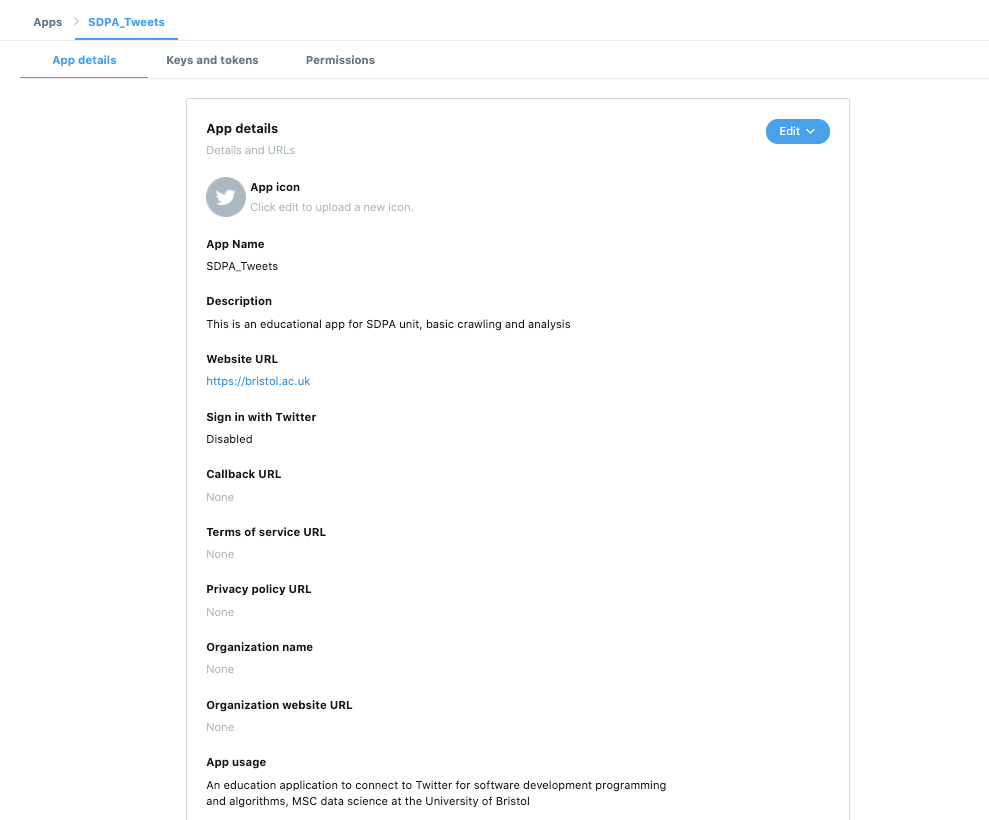

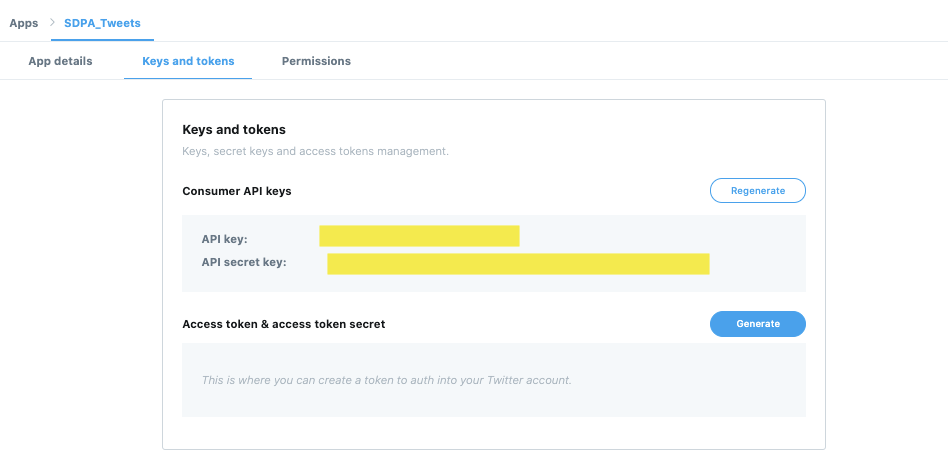

--------------------

## Example 3 (advanced): 

In this part, you will learn in details how to make calls to the Foursquare API for different purposes. You will learn how to construct a URL to send a request to the API to search for a specific type of venues, to explore a particular venue, to explore a Foursquare user, to explore a geographical location, and to get trending venues around a location. Also, you will learn how to use the visualization library, Folium, to visualize the results.
### Import necessary library: 

In [13]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# !conda install -c conda-forge geopy --yes 
!pip -q install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
!pip -q install folium
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Define Foursquare Credentials and Version
Make sure that you have created a Foursquare developer account on https://foursquare.com/developers/. and have your credentials handy. In addition to Credentials, we will need to specify the search questy, radius and other paratemers 

In [14]:

CLIENT_ID= '1WXQDWH2MFM22YBICDTE4JUSSNS0UW0HXEBEPP4U5AVIBNKU'
CLIENT_SECRET= 'FPPTICLZUR0SIX2TZJLNCUE1AVWHVQMDPIIZC232RTC00B44'
LIMIT = 30
search_query = 'Italian'
radius = 500
VERSION=20120609

Let's  assume that you are staying at the Bristol Mariott hotel. So let's start by converting the  Hotel's address to its latitude and longitude coordinates.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent, as shown below.


In [15]:
address = 'College Green, Bristol BS1 5TA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.4524224 -2.600881613862331


With this information, we can build the Search query for a specific venue category: 
> https://api.foursquare.com/v2/venues/search?client_id=CLIENT_ID&client_secret=CLIENT_SECRET&ll=LATITUDE,LONGITUDE&v=VERSION&query=QUERY&radius=RADIUS&limit=LIMIT

Now, let's assume that it is lunch time, and you are craving Italian food. So, let's define a query to search for Italian food that is within 500 metres from the Mariott Hotel.

In [16]:
# you give all the paratmerts to the URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [20]:
url

'https://api.foursquare.com/v2/venues/search?client_id=1WXQDWH2MFM22YBICDTE4JUSSNS0UW0HXEBEPP4U5AVIBNKU&client_secret=FPPTICLZUR0SIX2TZJLNCUE1AVWHVQMDPIIZC232RTC00B44&ll=51.4524224,-2.600881613862331&v=20120609&query=Italian&radius=500&limit=30'

In [28]:
import requests
results = requests.get(url).json()
#results

{'meta': {'code': 200, 'requestId': '637cd32cae54e041fb97b51c'},
 'response': {'venues': [{'id': '4b05883cf964a520c6b922e3',
    'name': 'ASK Italian',
    'contact': {},
    'location': {'address': '51 Park St.',
     'lat': 51.454427,
     'lng': -2.602756,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.454427,
       'lng': -2.602756}],
     'distance': 258,
     'postalCode': 'BS1 5NT',
     'cc': 'GB',
     'city': 'Bristol',
     'country': 'United Kingdom',
     'formattedAddress': ['51 Park St.',
      'Bristol',
      'BS1 5NT',
      'United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'shortName': 'Italian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'primary': True}],
    'verified': True,
    'stats': {'tipCount': 0,
     'usersCount': 0,
     'checkinsCount': 0,
     'visitsCount': 0}

## Get relevant part of JSON and transform it into a pandas dataframe¶


In [29]:

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,verified,referralId,venueChains,hasPerk,location.address,location.lat,location.lng,...,stats.visitsCount,beenHere.count,beenHere.lastCheckinExpiredAt,beenHere.marked,beenHere.unconfirmedCount,hereNow.count,hereNow.summary,hereNow.groups,location.neighborhood,location.state
0,4b05883cf964a520c6b922e3,ASK Italian,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",True,v-1669124908,[],False,51 Park St.,51.454427,-2.602756,...,0,0,0,False,0,0,Nobody here,[],NaN,NaN
1,50898575e4b069fe570a61a3,Prezzo,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,v-1669124908,[],False,Anchor Rd,51.450415,-2.599397,...,0,0,0,False,0,0,Nobody here,[],"Harbourside, Bristol, Bristol",Bristol


## Plot data on Map


### Let's visualize the Italian restaurants that are nearby


In [23]:
dataframe.name

0    ASK Italian
1         Prezzo
Name: name, dtype: object

In [24]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# folium.features.CircleMarker
# add a red circle marker to represent the Mariott Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe['location.lat'], dataframe['location.lng'], dataframe.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### <font color= 'blue'> Question: </font>: Explore and visualise on map trending venues in your area

# Part B: HTML based scraping



In this part we will look at a few HTML fundamentals to understand how web scraping works and scrape a website for structured data. 

We will cover the following: 
- HTTP Requests to crawl HTML page
- Reading HTML table with Pandas
- Parsing HTML page with BeautifulSoup

## 1. HTTP Requests in Python: The requests Package

Instead of the browser requesting for the content of the webpage, Python can be used for the same. A HTTP request to the web server can be sent with the requests library and the response can be examined. Typically every request receives a response with response headers and status code details.
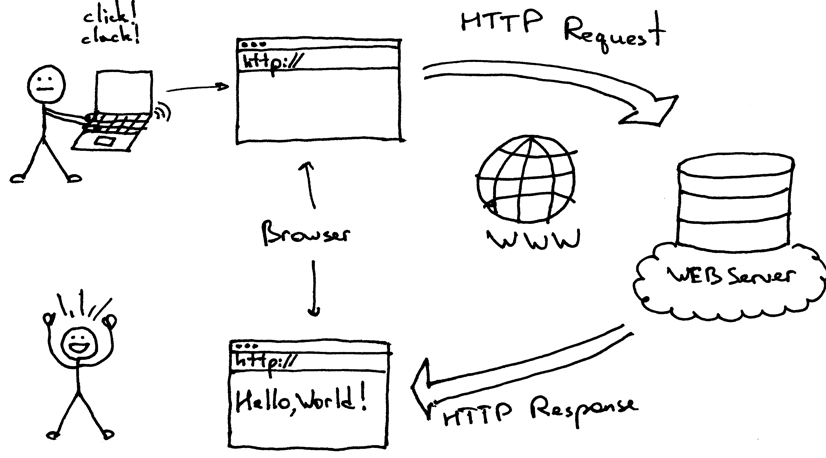
image source: https://monashdatafluency.github.io/pytho

Let us request for the web content for this web site https://api.github.com/events The requests library can be used to work with webpages and web content. A request is made to get the content of the webpage with the get() method. The requests module provides an easy and handy API to send http requests over the network.


In [31]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


### Usage
A brief example (based on the requests documentation http://docs.python-requests.org/en/latest/user/quickstart/):

In [40]:
import requests
r = requests.get('https://api.github.com/events')
print ("Status of request (200=success): %d"%r.status_code)

Status of request (200=success): 200


### The request object
The request is the main source of invoking http requst. For every request method (the verbs), a separate function exist.

A response is received from the web server. This response will have response headers and status codes associated to that particular request. Response headers give the detailed information about the request made to the web server.


In [41]:
r.headers

{'Server': 'GitHub.com', 'Date': 'Tue, 22 Nov 2022 13:54:56 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept, Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"4f216a5930207905f79cf30bbae2ebd7bebbf06a243a1e98f61fc7887d14a583"', 'Last-Modified': 'Tue, 22 Nov 2022 13:49:56 GMT', 'X-Poll-Interval': '60', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Link': '<https://api.github.com/events?page=2>; rel="next", <https://api.github.com/events?page=9>; rel="last"', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 

In [42]:
print ("HTTP Headers %s"%str(r.headers['content-type']))

HTTP Headers application/json; charset=utf-8


Every response will have a status code. The status codes indicate whether a specific HTTP request has been successfully completed. Responses are grouped in five classes:

- Informational responses (100–199)
- Successful responses (200–299)
- Redirects (300–399)
- Client errors (400–499)
- Server errors (500–599)
Let us check the response status code for the HTTP request we placed



In [43]:
print ("Status of request (200=success): %d"%r.status_code)

Status of request (200=success): 200


Response automatically decode content from the server by guessing/estimating the encoding. The content can be accessed under the 'text' field. After changing the encoding through setting 'encoding' subsquent access to 'text' provides the new encoding.

In [44]:
r.text[1:1000]

'{"id":"25403536278","type":"PushEvent","actor":{"id":35623314,"login":"jsalignon","display_login":"jsalignon","gravatar_id":"","url":"https://api.github.com/users/jsalignon","avatar_url":"https://avatars.githubusercontent.com/u/35623314?"},"repo":{"id":428594475,"name":"jsalignon/cactus","url":"https://api.github.com/repos/jsalignon/cactus"},"payload":{"push_id":11749556403,"size":1,"distinct_size":1,"ref":"refs/heads/main","head":"ff49574ab638e5cb848b1da31f33440591d90cd0","before":"fd6c6047aa4ea4bdde1579e7e01b74497884a692","commits":[{"sha":"ff49574ab638e5cb848b1da31f33440591d90cd0","author":{"email":"takeo1@hotmail.fr","name":"Jerome Salignon"},"message":"updating the parameters doc","distinct":true,"url":"https://api.github.com/repos/jsalignon/cactus/commits/ff49574ab638e5cb848b1da31f33440591d90cd0"}]},"public":true,"created_at":"2022-11-22T13:49:56Z"},{"id":"25403536273","type":"CreateEvent","actor":{"id":49699333,"login":"dependabot[bot]","display_login":"dependabot","gravatar_id

### JSON Response Content
JSON is returned via requests.json

In [49]:
print (type(r.json()))
#pretty print the json using json.dumps
#print (json.dumps(r.json(), indent =  4))

SyntaxError: invalid syntax (2196801601.py, line 3)

-----------

## 2.  Reading HTML tables with Pandas
The pandas read_html() function is a quick and convenient way to turn an HTML table into a pandas DataFrame. This function can be useful for quickly incorporating tables from various websites without figuring out how to scrape the site’s HTML. However, there can be some challenges in cleaning and formatting the data before analysing it.The basic usage is of pandas read_html is pretty simple and works well on many Wikipedia pages since the tables are not complicated.

In [1]:
import pandas as pd
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')

In [2]:
print(f'Total tables: {len(table_MN)}')

Total tables: 31


In [3]:
!pip install html5lib
import html5lib

Defaulting to user installation because normal site-packages is not writeable


With 38 tables, it can be challenging to find the one you need. To make the table selection easier, use the match parameter to select a subset of tables. We can use the caption “Election results from statewide races” to select the table:

In [8]:
import re
import requests

#'Election results from statewide races

table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='election results for Minnesota')

print(table_MN)

[    Year Republican         Democratic         Third party        
    Year        No.       %        No.       %         No.       %
0   2020    1484065  45.28%    1717077  52.40%       76029   2.32%
1   2016    1323232  44.93%    1367825  46.44%      254176   8.63%
2   2012    1320225  44.96%    1546167  52.65%       70169   2.39%
3   2008    1275409  43.82%    1573354  54.06%       61606   2.12%
4   2004    1346695  47.61%    1445014  51.09%       36678   1.30%
5   2000    1109659  45.50%    1168266  47.91%      160760   6.59%
6   1996     766476  34.96%    1120438  51.10%      305726  13.94%
7   1992     747841  31.85%    1020997  43.48%      579110  24.66%
8   1988     962337  45.90%    1109471  52.91%       24982   1.19%
9   1984    1032603  49.54%    1036364  49.72%       15482   0.74%
10  1980     873241  42.56%     954174  46.50%      224538  10.94%
11  1976     819395  42.02%    1070440  54.90%       60096   3.08%
12  1972     898269  51.58%     802346  46.07%       41037   

In [9]:
df = table_MN[0]
df.head()

Year Republican         Democratic         Third party       
   Year        No.       %        No.       %         No.      %
0  2020    1484065  45.28%    1717077  52.40%       76029  2.32%
1  2016    1323232  44.93%    1367825  46.44%      254176  8.63%
2  2012    1320225  44.96%    1546167  52.65%       70169  2.39%
3  2008    1275409  43.82%    1573354  54.06%       61606  2.12%
4  2004    1346695  47.61%    1445014  51.09%       36678  1.30%

Pandas makes it easy to read in the table and also handles the year column that spans multiple rows. This is an example where it is easier to use pandas than to try to scrape it all yourself.

Overall, this looks ok until we look at the data types with df.info() :

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   (Year, Year)        41 non-null     int64 
 1   (Republican, No.)   41 non-null     int64 
 2   (Republican, %)     41 non-null     object
 3   (Democratic, No.)   41 non-null     int64 
 4   (Democratic, %)     41 non-null     object
 5   (Third party, No.)  41 non-null     int64 
 6   (Third party, %)    41 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.4+ KB


## Example 2: Yahoo finance

In [11]:
!pip install html5lib 

Defaulting to user installation because normal site-packages is not writeable


In [12]:
url_link = 'https://finance.yahoo.com/quote/NFLX/history?p=NFLX%27'
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0'})
read_html_pandas_data = pd.read_html(r.text)
print(read_html_pandas_data)

[                                                  Date  \
0                                         Nov 21, 2022   
1                                         Nov 18, 2022   
2                                         Nov 17, 2022   
3                                         Nov 16, 2022   
4                                         Nov 15, 2022   
..                                                 ...   
96                                        Jul 07, 2022   
97                                        Jul 06, 2022   
98                                        Jul 05, 2022   
99                                        Jul 01, 2022   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  Open  \
0                                               291.00   
1                                               297.33   
2                                               294.72   
3                                               309.94   
4           

To get a DataFrame from this list, you only need to make one addition:


In [13]:
df= pd.read_html(r.text)[0]

In [16]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Nov 21, 2022",291.00,291.87,282.66,285.05,285.05,7247700
1,"Nov 18, 2022",297.33,298.00,287.00,287.98,287.98,8392100
2,"Nov 17, 2022",294.72,299.82,291.00,295.28,295.28,9838200
3,"Nov 16, 2022",309.94,310.49,303.61,306.02,306.02,8038600
4,"Nov 15, 2022",309.20,312.71,302.55,310.20,310.20,14626900


### Example 3: 
Let us now scrape a list of the fotune 500 companies for the year 2018. The website from which the data is to be scraped is this.https://www.zyxware.com/articles/5914/list-of-fortune-500-companies-and-their-websites-2018

In [19]:
url_link= 'https://www.zyxware.com/articles/5914/list-of-fortune-500-companies-and-their-websites-2018'
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0'})
data500 = pd.read_html(r.text)
print(f'Extracted {len(data500)} table/s')
data500[0]

Extracted 1 table/s


,Rank,Company,Website
0,1,Walmart,http://www.stock.walmart.com
1,2,Exxon Mobil,http://www.exxonmobil.com
2,3,Berkshire Hathaway,http://www.berkshirehathaway.com
3,4,Apple,http://www.apple.com
4,5,UnitedHealth Group,http://www.unitedhealthgroup.com
...,...,...,...
495,496,Polaris Industries,http://www.polaris.com
496,497,Pioneer Natural Resources,http://www.pxd.com
497,498,ABM Industries,http://www.abm.com
498,499,Vistra Energy,http://www.vistraenergy.com


### <font color= 'Blue'> Question: </font>

Extract cities in the UK from information in tables on this website
https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom

In [32]:
url_link = "https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom"
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0'})
df = pd.read_html(r.text)
df[0]

,City[3][1],Year grantedor confirmed,City council status,Nation/region,Image,Population[b]
0,Aberdeen32(Scots: Aiberdeen)(Scottish Gaelic: ...,189131(Burgh: 1179),Local government district(Council area) Map,Scotland,NaN,22279338
1,Armagh11(Irish: Ard Mhacha)(Ulster-Scots: Airm...,1994,"None. Represented on Armagh City, Banbridge an...",Northern Ireland,NaN,"14,777 (2011)[15]"
2,"Bangor, Wales1",time immemorial,Community Map,Wales,NaN,"18,808 (2011)[16]"
3,Bath1,1090,Charter trustees Map,"South West, England",NaN,"88,859 (2011)[17]97,311 (urban area, 2010)[18]"
4,Belfast(Irish: Béal Feirste)(Ulster-Scots: Bil...,1888,Local government district Map,Northern Ireland,NaN,"333,871 (2011)[19]"
...,...,...,...,...,...,...
70,Winchester1,time immemorial,Local government district(Non-metropolitan bor...,"South East, England",NaN,"116,595 (2011)[21]"
71,Wolverhampton16,2001,Local government district(Metropolitan borough...,"West Midlands, England",NaN,"249,470 (2011)[21]"
72,Worcester3,time immemorial,Local government district(Non-metropolitan bor...,"West Midlands, England",NaN,"98,768 (2011)[21]"
73,Wrexham (Welsh: Wrecsam),202243,Local government district(Principal area) Map,Wales,NaN,"134,844 (2011)[21]"


## Parsing HTML page with BeautifulSoup: 
You might need to parse HTML for information that are not represented in tables. 


## Step 1: Send a request and get the page contents 

In [1]:
import requests
import pandas as pd

web_url = 'https://www.bhalpaca.com/alpaca-snow-day/'
response = requests.get(web_url)

print('Status code\n', response.status_code)
print('\n--\n')
print('Content of the website\n', response.content[:2000])


Status code
 403

--

Content of the website
 b'<!DOCTYPE html>\n<html lang=\'en\'>\n\t<head>\n\t\t<meta charset=\'utf-8\' />\n\t\t<meta name=\'viewport\' content=\'width=device-width, initial-scale=1\' />\n\t\t<meta http-equiv="cache-control" content="no-cache">\n\t\t<meta http-equiv="cache-control" content="private">\n\t\t<meta http-equiv="cache-control" content="max-age=0, must-revalidate">\n\t\t<meta http-equiv="cache-control" content="max-age=0, proxy-revalidate">\n\t\t<meta http-equiv="expires" content="0" />\n\t\t<meta http-equiv="expires" content="Tue, 01 Jan 1980 1:00:00 GMT" />\n\t\t<meta http-equiv="pragma" content="no-cache" />\n\n\t  <!--[if lt IE 9]>\n\t  <script src=\'http://html5shiv.googlecode.com/svn/trunk/html5.js\'></script>\n\t  <![endif]-->\n\t<style>\n\t\thtml{font-size: 14pt;}\n\t\th1{text-align:center}\n\t\th1.main{margin-top: 1em;margin-bottom: 3em;}\n\t\tdiv.container {text-align:center;}\n\t\tdiv.container p.js_notice{width: 60%; display: inline-block;}\n\t\

## Step 2: Parsing HTML and accessing different elements¶


bs4 is a Python library which parses through HTML content and understands the complete structure of the content. The response content can be passed to a BeautifulSoup() method to obtain a soup object which looks very structured.

In [2]:
! pip install bs4

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from bs4 import BeautifulSoup
soup_object = BeautifulSoup(response.content)

# Uncomment the below line and look into the contents of soup_object
print(soup_object.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="no-cache" http-equiv="cache-control"/>
  <meta content="private" http-equiv="cache-control"/>
  <meta content="max-age=0, must-revalidate" http-equiv="cache-control"/>
  <meta content="max-age=0, proxy-revalidate" http-equiv="cache-control"/>
  <meta content="0" http-equiv="expires"/>
  <meta content="Tue, 01 Jan 1980 1:00:00 GMT" http-equiv="expires"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <!--[if lt IE 9]>
	  <script src='http://html5shiv.googlecode.com/svn/trunk/html5.js'></script>
	  <![endif]-->
  <style>
   html{font-size: 14pt;}
		h1{text-align:center}
		h1.main{margin-top: 1em;margin-bottom: 3em;}
		div.container {text-align:center;}
		div.container p.js_notice{width: 60%; display: inline-block;}
		div.footer {color: #666; text-align: center;}
		div.footer a {color: #666; vertical-align:bottom; text-align: cente

### Explore the schema: Manipulating elments of HTML page


To be able to accurately extract relevant data from the webpage, it is important to explore the schema and understand the structure of the webpage. A good way to do this is to inspect the webpage directly on a web browser.

This HTML content is  transformed into a BeautifulSoup object, with the following structure:

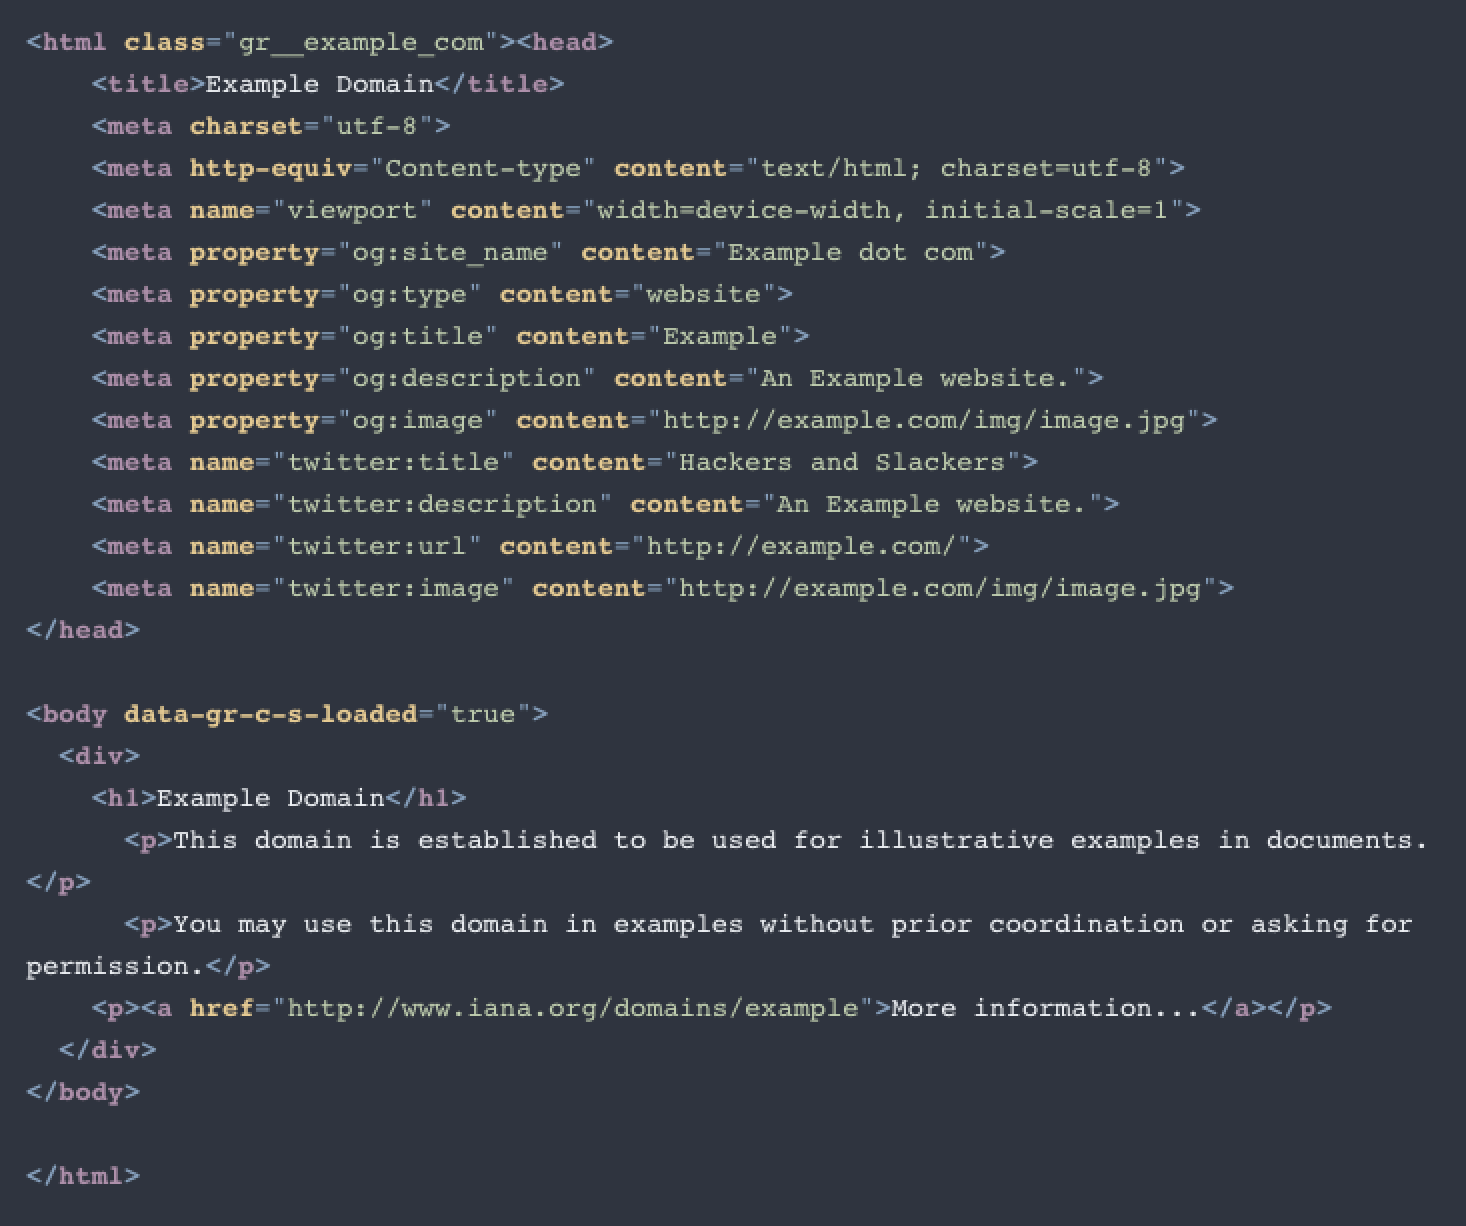

To inspect elements in th epage, open the webpage on a browser - Right click on the data content to be extracted - Click on Inspect or Inspect element option This will open a console window which shows the real time HTML code corresponding to the web content. Now identify the type of HTML tag which contains all the data along with any id names or class names associated to that HTML tag. In our case, the data is enclosed in the \<table> HTML tag with the class name 'data-table'. This information can be used to search for the web content directly in our soup object with the find_all() method. This will return a soup object.

If you are not familiar with HTML, take some time to read about HTML element tags, HTML element attributes and HTML classes. Knowing about these parts of HTML will make it much easier for us to identify and extract the data we want. Let's first what is inside the soup object as a text




In [4]:
## Uncomment this to see the contents
print(soup_object.get_text())























Anti-Crawler Protection is checking your browser and IP 137.222.127.63 for spam bots
To continue working with the web site, please make sure that you have enabled JavaScript.


You will be automatically redirected to the requested page after 3 seconds.Don't close this page. Please, wait for 3 seconds to pass to the page.







The page was generated at Tue, 22 Nov 2022 14:45:43
Browser time 



877676, 15105, 
https://www.bhalpaca.com, 5.189


Anti-Spam by CleanTalk








There are a lot of blank lines in this output. These are the result of newline characters in the HTML document’s text. 

The most straightforward way to finding information in our soup variable is by utilizing soup.find(...) or soup.find_all(...). These two methods work the same with one exception: find returns the first HTML element found, whereas find_all returns a list of all elements matching the criteria (even if only one element is found, find_all will return a list of a single item).


- Often, you need to get only specific text from an HTML document. Using Beautiful Soup first to extract the text and then using the .find() string method is sometimes easier than working with regular expressions.

- However, sometimes the HTML tags themselves are the elements that point out the data you want to retrieve. For instance, perhaps you want to retrieve the URLs for all the images on the page. These links are contained in the src attribute of \<img> HTML tags. In this case, you can use find_all() to return a list of all instances of that particular tag

In [11]:
#find a tag
soup_object.find_all("img")

[]

This returns a list of all \<img> tags in the HTML document. The objects in the list look like they might be strings representing the tags, but they’re actually instances of the Tag object provided by Beautiful Soup. Tag objects provide a simple interface for working with the information they contain.

Let’s explore this a little by first unpacking the Tag objects from the list:

In [12]:
image1 = soup_object.find_all("img")[0]

IndexError: list index out of range

Each Tag object has a .name property that returns a string containing the HTML tag type.ou can access the HTML attributes of the Tag object by putting their name between square brackets, just as if the attributes were keys in a dictionary.

For example, the \<img src="/static/dionysus.jpg"/> tag has a single attribute, src, with the value "/static/dionysus.jpg". Likewise, an HTML tag such as the link \<a href="https://realpython.com" target="_blank"> has two attributes, href and target.

To get the source of the images in the Dionysus profile page, you access the src attribute using the dictionary notation mentioned above:


In [13]:
image1["src"]

NameError: name 'image1' is not defined

## <font color= "blue">Question:</font>
- Extract "Leave a Reply" title from this article
-  Extract all links on the page

### References: 
- https://pbpython.com/pandas-html-table.html
- https://monashdatafluency.github.io/python-web-scraping/section-2-HTML-based-scraping/
- https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741
- For some of you who are interested in Earth data analytics
https://www.earthdatascience.org/courses/use-data-open-source-python/
- https://monashdatafluency.github.io/python-web-scraping/section-3-API-based-scraping/
- List of public APIs https://github.com/public-apis/public-apis
- More on FourSquare API https://gist.github.com/doscsy12/7457716c264249c8a8ef19a053dd9605